<a href="https://colab.research.google.com/github/gremlin97/EVA-8/blob/main/S7/s7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install grad-cam

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!git clone https://github.com/gremlin97/EVA-Utils

Cloning into 'EVA-Utils'...
remote: Enumerating objects: 76, done.
remote: Counting objects: 100% (76/76), done.
remote: Compressing objects: 100% (72/72), done.
remote: Total 76 (delta 42), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (76/76), 18.81 KiB | 1.04 MiB/s, done.


In [ ]:
import albumentations as A
from albumentations.pytorch import ToTensorV2
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.optim as optim

In [ ]:
%cd EVA-Utils

/content/EVA-Utils/EVA-Utils


In [ ]:
from main import *
from utils import *

In [ ]:
trainloader, testloader = init_dataloader(4)
optimizer = init_modeloptim(0.001)

plane   dog  frog truck


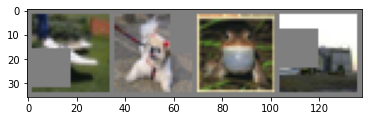

In [ ]:
# get some random training images
dataiter = iter(trainloader)
images, labels = next(iter(dataiter))

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [ ]:
from torchsummary import summary
summary(net.to(device),(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

In [ ]:
loss_arr = train(20, optimizer, trainloader)

[1,  2000] loss: 1.061
[1,  4000] loss: 1.057
[1,  6000] loss: 1.024
[1,  8000] loss: 0.946
[1, 10000] loss: 0.909
[1, 12000] loss: 0.924
Accuracy is: 65.316
[2,  2000] loss: 0.799
[2,  4000] loss: 0.787
[2,  6000] loss: 0.789
[2,  8000] loss: 0.776
[2, 10000] loss: 0.766
[2, 12000] loss: 0.747
Accuracy is: 72.728
[3,  2000] loss: 0.649
[3,  4000] loss: 0.658
[3,  6000] loss: 0.648
[3,  8000] loss: 0.638
[3, 10000] loss: 0.637
[3, 12000] loss: 0.625
Accuracy is: 77.45
[4,  2000] loss: 0.532
[4,  4000] loss: 0.542
[4,  6000] loss: 0.552
[4,  8000] loss: 0.546
[4, 10000] loss: 0.553
[4, 12000] loss: 0.550
Accuracy is: 80.906
[5,  2000] loss: 0.449
[5,  4000] loss: 0.480
[5,  6000] loss: 0.472
[5,  8000] loss: 0.463
[5, 10000] loss: 0.480
[5, 12000] loss: 0.479
Accuracy is: 83.568
[6,  2000] loss: 0.388
[6,  4000] loss: 0.396
[6,  6000] loss: 0.410
[6,  8000] loss: 0.406
[6, 10000] loss: 0.418
[6, 12000] loss: 0.421
Accuracy is: 85.802
[7,  2000] loss: 0.329
[7,  4000] loss: 0.338
[7,  60

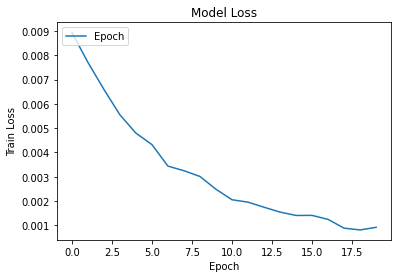

In [ ]:
# Plotting Loss 
plt.plot(loss_arr)
plt.title('Model Loss')
plt.ylabel('Train Loss')
plt.xlabel('Epoch')
plt.legend(['Epoch'], loc='upper left')
plt.show()

In [ ]:
plot_arr, pre = test_model(testloader)

Accuracy of the network on the 10000 test images: 86 %


<Figure size 720x720 with 0 Axes>

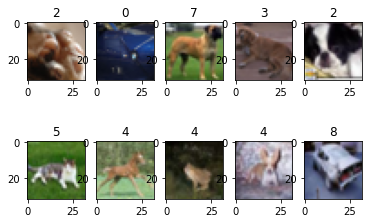

In [ ]:
plot_missclassified(plot_arr, pre)

In [ ]:
from PIL import Image
import torchvision.transforms.functional as TF
from pytorch_grad_cam.utils.image import show_cam_on_image, preprocess_image
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget

In [ ]:
res = grad_cam(net, plot_arr)

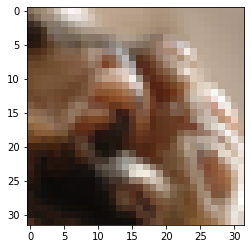

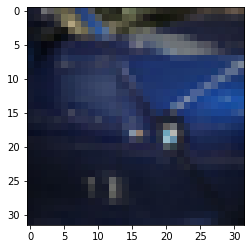

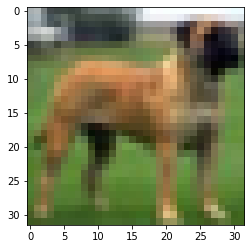

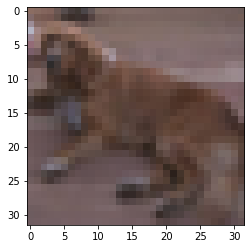

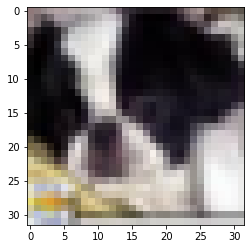

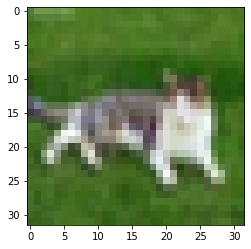

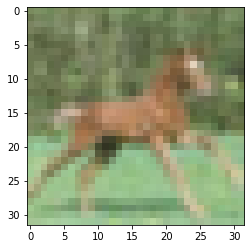

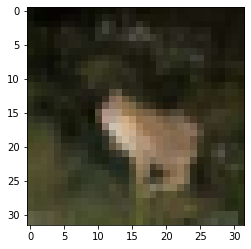

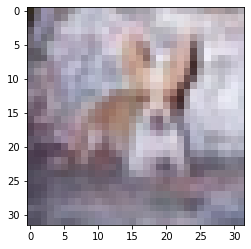

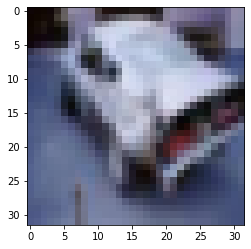

In [ ]:
for i in range(0,10):
    plt.figure()
    plt.imshow(plot_arr[i])

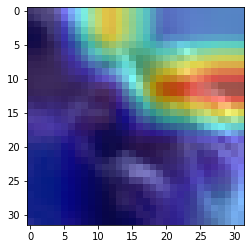

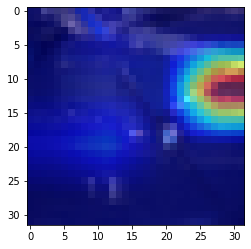

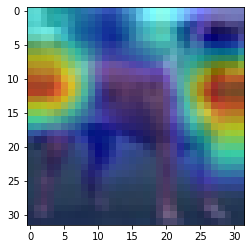

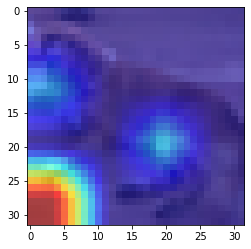

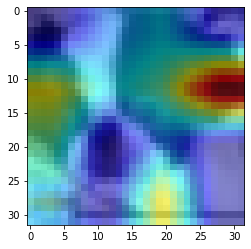

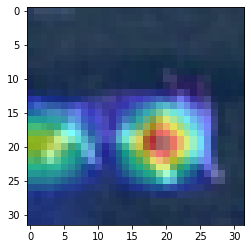

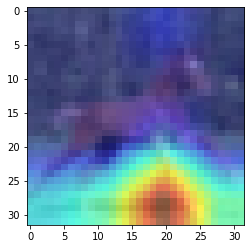

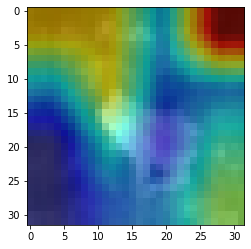

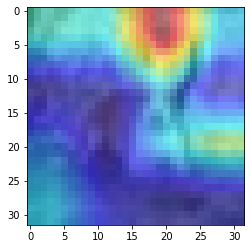

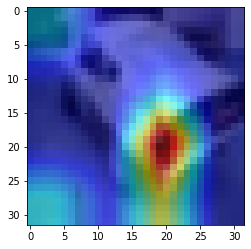

In [ ]:
for x in res:
    plt.figure()
    plt.imshow(x)